# Single Particle Simulation


Simulate the trajectory of a particle in a perfectly circular flow (i.e.
_solid body rotation_), which may represent e.g. an ocean meso-scale eddy.

![solid body rotation](https://github.com/JuliaClimate/IndividualDisplacements.jl/raw/master/examples/figs/SolidBodyRotation.gif)

As an exercise left to the user, directions are provided e.g. to add a convergence / divergence term.
For additional documentation e.g. see :
[1](https://JuliaClimate.github.io/IndividualDisplacements.jl/dev/),
[2](https://JuliaClimate.github.io/MeshArrays.jl/dev/),
[3](https://docs.juliadiffeq.org/latest/solvers/ode_solve.html),
[4](https://en.wikipedia.org/wiki/Displacement_(vector))

- 1. setup the software and initialize example
- 2. simulate trajectories & plot results
- 3. experiment with parameters (user)

## 1.1 Import Software

In [1]:
using OrdinaryDiffEq, Plots
using IndividualDisplacements, MeshArrays

## 1.2  Gridded Domain

- define `SetPeriodicDomain` function, which uses `MeshArrays.jl`
- call `SetPeriodicDomain` function with a chosen grid size; e.g. `np=16`

In [2]:
np=16
nz=4

Γ=simple_periodic_domain(np);

## 1.3 Time & Velocity Fields

- define time range
- define velocity field(s)
- store in `𝑃` (dictionary) with grid variables

In [3]:
#time range
t0=0.0
t1=0.95*2*pi
#t1=2.95*2*pi
t1=19.95*2*pi

#solid-body rotation around central location
i=Int(np/2+1)
u=-(Γ["YG"].-Γ["YG"][1][i,i])
v=(Γ["XG"].-Γ["XG"][1][i,i])

#add some convergence to / divergence from central location
d=0.0
d=-0.01
u=u+d*(Γ["XG"].-Γ["XG"][1][i,i])
v=v+d*(Γ["YG"].-Γ["YG"][1][i,i])

#"vertical" component w
γ=Γ["XC"].grid
w=fill(1.0,MeshArray(γ,γ.ioPrec,nz))

#replicate u,v "vertically"
uu=MeshArray(γ,γ.ioPrec,nz)
[uu[k]=u[1] for k=1:nz]
vv=MeshArray(γ,γ.ioPrec,nz)
[vv[k]=v[1] for k=1:nz]

#store everything in a dictionnary
𝑃=Dict("u0" => uu, "u1" => uu, "v0" => vv, "v1" => vv,
       "w0" => 0.0*w, "w1" => -0.01*w, "t0" => t0, "t1" => t1)
𝑃=merge(𝑃,Γ);

## 1.4 Initial Position and Time

In [4]:
u0=[np*1/3,np*1/3,nz*1/3]
du=fill(0.0,3)
𝑇 = (𝑃["t0"],𝑃["t1"]);

## 2.1 Solve For Particle Trajectory

- `ODEProblem` formulates the differential equation along with the time period `𝑇`, parameters `𝑃`
- `solve` then performs the integration over `𝑇`, starting from `u0`

_For additional documentation, try `?ODEProblem` or `?solve`_

In [5]:
prob = ODEProblem(dxyz_dt,u0,𝑇,𝑃)
sol = solve(prob,Tsit5(),reltol=1e-8)

x,y,z=sol[1,:],sol[2,:],sol[3,:]
nt=length(x)

3620

## 2.2 Visualize Particle Trajectory

- define `myplot` convenience function
- generate animation using `myplot`
- single plot example using `myplot`

In [6]:
myplot(i)=plot(x[1:i],y[1:i],z[1:i],linewidth=2,arrow = 2,
    title="Solid body rotation / Spiral example",leg=false,
    xaxis="x",yaxis="y",zaxis="z",xlims=(0,np),ylims=(0,np))

myplot (generic function with 1 method)

Animation example:

In [7]:
if false
p=Int(ceil(nt/100))
anim = @animate for i ∈ 1:p:nt
    myplot(i)
end
pth=tempdir()*"/"
gif(anim, pth*"SolidBodyRotation.gif", fps = 15)
end

Single plot example:

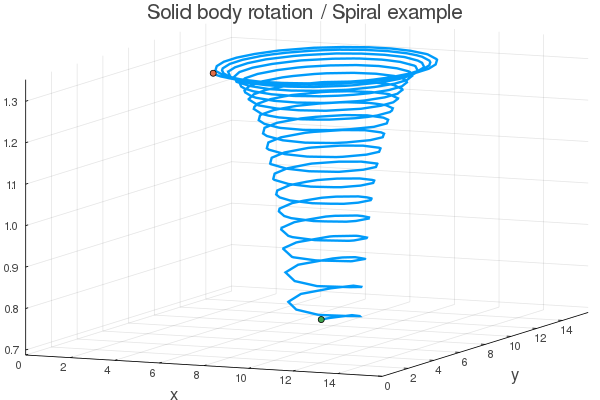

In [8]:
plt=myplot(nt)
scatter!(plt,[u0[1]],[u0[2]],[u0[3]])
scatter!(plt,[x[end]],[y[end]],[z[end]])

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*